Loading the TimeSeries created in the lowest level

In [2]:
import pickle


with open("/path/to/pklFiles/low_series_dict.pkl","rb") as file:
    target_series_dict=pickle.load(file)

create lists of timeseries for training,validation,test and forecast

In [3]:
import numpy as np
from darts.dataprocessing.transformers import  StaticCovariatesTransformer

train_target_list = []
test_target_list = []
future_covariates_list = []
all_ids = []

MIN_TRAIN_LENGTH = 150

for i_id in  (target_series_dict.keys()):
    full_target_series, covariates = target_series_dict[i_id]
    print(i_id)
    # if len(full_target_series) < MIN_TRAIN_LENGTH:
    #         continue
    
    all_ids.append(i_id)
    train_target, test_target = full_target_series[:-28],full_target_series[-28:]

    static_scaler = StaticCovariatesTransformer(transformer_num=None, cols_num=None)
    train_target = static_scaler.fit_transform(train_target)
    test_target = static_scaler.transform(test_target)
    # --- CAST HERE to float32 ---
    train_target = train_target.astype(np.float32)
    test_target = test_target.astype(np.float32)


    train_target_list.append(train_target)
    test_target_list.append(test_target)
    future_covariates_list.append(covariates.astype(np.float32))


print(f"Number of series: {len(all_ids)}")
print(f"Example training series length: {train_target_list[0].n_timesteps}")
print(f"Example test series length: {test_target_list[0].n_timesteps}")
print(f"Example covariates series length: {future_covariates_list[0].n_timesteps}")

CA_1_FOODS_1_001
CA_1_FOODS_1_002
CA_1_FOODS_1_003
CA_1_FOODS_1_004
CA_1_FOODS_1_005
CA_1_FOODS_1_006
CA_1_FOODS_1_008
CA_1_FOODS_1_009
CA_1_FOODS_1_010
CA_1_FOODS_1_011
CA_1_FOODS_1_012
CA_1_FOODS_1_013
CA_1_FOODS_1_014
CA_1_FOODS_1_015
CA_1_FOODS_1_016
CA_1_FOODS_1_017
CA_1_FOODS_1_018
CA_1_FOODS_1_019
CA_1_FOODS_1_020
CA_1_FOODS_1_021
CA_1_FOODS_1_022
CA_1_FOODS_1_023
CA_1_FOODS_1_024
CA_1_FOODS_1_025
CA_1_FOODS_1_026
CA_1_FOODS_1_027
CA_1_FOODS_1_028
CA_1_FOODS_1_029
CA_1_FOODS_1_030
CA_1_FOODS_1_031
CA_1_FOODS_1_032
CA_1_FOODS_1_033
CA_1_FOODS_1_034
CA_1_FOODS_1_035
CA_1_FOODS_1_036
CA_1_FOODS_1_037
CA_1_FOODS_1_038
CA_1_FOODS_1_039
CA_1_FOODS_1_040
CA_1_FOODS_1_041
CA_1_FOODS_1_042
CA_1_FOODS_1_043
CA_1_FOODS_1_044
CA_1_FOODS_1_045
CA_1_FOODS_1_046
CA_1_FOODS_1_047
CA_1_FOODS_1_048
CA_1_FOODS_1_049
CA_1_FOODS_1_050
CA_1_FOODS_1_051
CA_1_FOODS_1_052
CA_1_FOODS_1_053
CA_1_FOODS_1_054
CA_1_FOODS_1_055
CA_1_FOODS_1_056
CA_1_FOODS_1_057
CA_1_FOODS_1_058
CA_1_FOODS_1_059
CA_1_FOODS_1_0

Train a model for each individual timeseries, foracsting and saving the accroding forecast

In [3]:
from darts.models import LightGBMModel

forecasts_dict = {}

for i_id in all_ids:
    # Prepare training & validation series
    # (assuming train_target_list and val_target_list have the same order as all_ids)
    i = all_ids.index(i_id)
    train_series = train_target_list[i]
    cov_series = future_covariates_list[i]
    #test_series = test_target_list[i]
    # Initialize ARIMA model
    model = LightGBMModel(
    # Choose your lags (number of past timesteps to use). For example:
        lags=28,  # or range(1,29) if you want t-1 to t-28
        #lags_past_covariates=28,
        lags_future_covariates=list(range(-28,0)),
        use_static_covariates=False,
        # All LightGBM hyperparams:
        boosting_type="gbdt",
        #objective="tweedie",
        tweedie_variance_power=1.1,
        metric='mse',
        n_jobs=-1,
        random_state=42,  # "seed" is deprecated in newer LightGBM; use random_state
        learning_rate=0.2,
        bagging_fraction=0.85,
        bagging_freq=1,
        colsample_bytree=0.85,    # or "feature_fraction=0.85" is also valid
        colsample_bynode=0.85,    # or "feature_fraction_bynode=0.85"
        lambda_l1=0.5,
        lambda_l2=0.5,
        verbose = -1,
        categorical_future_covariates = [#"tm_d","tm_m","tm_y", "tm_w_end", "tm_dw", "tm_wm",
                                    "event_name_1_enc", "event_type_1_enc", "event_name_2_enc", "event_type_2_enc"],
    )   
    
    # Fit
    model.fit(series=train_series, future_covariates=cov_series)
    
    # Predict
    forecast = model.predict(n=28, series=train_series,future_covariates=cov_series )
    
    # Store the forecast
    forecasts_dict[i_id] = forecast
    print(f"Fitted and Forcasted the series with id ->{i_id}")
    

Fitted and Forcasted the series with id ->CA_1_FOODS_1_001
Fitted and Forcasted the series with id ->CA_1_FOODS_1_002
Fitted and Forcasted the series with id ->CA_1_FOODS_1_003
Fitted and Forcasted the series with id ->CA_1_FOODS_1_004
Fitted and Forcasted the series with id ->CA_1_FOODS_1_005
Fitted and Forcasted the series with id ->CA_1_FOODS_1_006
Fitted and Forcasted the series with id ->CA_1_FOODS_1_008
Fitted and Forcasted the series with id ->CA_1_FOODS_1_009
Fitted and Forcasted the series with id ->CA_1_FOODS_1_010
Fitted and Forcasted the series with id ->CA_1_FOODS_1_011
Fitted and Forcasted the series with id ->CA_1_FOODS_1_012
Fitted and Forcasted the series with id ->CA_1_FOODS_1_013
Fitted and Forcasted the series with id ->CA_1_FOODS_1_014
Fitted and Forcasted the series with id ->CA_1_FOODS_1_015
Fitted and Forcasted the series with id ->CA_1_FOODS_1_016
Fitted and Forcasted the series with id ->CA_1_FOODS_1_017
Fitted and Forcasted the series with id ->CA_1_FOODS_1_0

Saving the forecasts for later use

In [4]:
import pickle

file_path = "/path/to/BasicModels/lgbm/Item_Forecasting/pkl_files/forecasts_dict_low.pkl"

with open(file_path,'wb') as file:
    pickle.dump(forecasts_dict, file)


In [1]:
import pickle

file_path = "/path/to/BasicModels/lgbm/Item_Forecasting/pkl_files/forecasts_dict_low.pkl"

# Load the pickle file
with open(file_path, 'rb') as file:
    forecasts_dict = pickle.load(file)


In [4]:
forecasts_list = list(forecasts_dict.values())

In [5]:
import pandas as pd 
weights_df = pd.read_csv("/path/to/ExtraFiles/weights_validation.csv")

# We only want rows for Level12
weights_df = weights_df[weights_df["Level_id"] == "Level12"].copy()

# Create a new 'id' column by combining Agg_Level_1 and Agg_Level_2
weights_df["id"] =weights_df["Agg_Level_2"] + "_" + weights_df["Agg_Level_1"] 


weights_df = weights_df.sort_values(['id'])
# Build a dictionary: {id_string: weight_value}
weights_map = dict(zip(weights_df["id"], weights_df["weight"]))

In [6]:
from darts.metrics import rmsse
wrmsse_list = []

for i in range(0,len(all_ids)):
    i_id = all_ids[i]
    weight_value = weights_map[i_id]
    wrmsse_value = weight_value*rmsse(actual_series=test_target_list[i],pred_series=forecasts_list[i], insample=train_target_list[i])
    wrmsse_list.append(wrmsse_value)

In [7]:
print(f"WRMSSE = {sum(wrmsse_list)}")

WRMSSE = 0.9567592360235698


In [8]:
from darts.metrics import mae, rmse 
mae_list = []
rmse_list = []

for i in range(len(all_ids)):
    mae_error = mae(test_target_list[i],forecasts_list[i])
    rmse_error = rmse(test_target_list[i],forecasts_list[i])
    mae_list.append(mae_error)
    rmse_list.append(rmse_error)
    
print(f"Mean RMSE -> {np.mean(rmse_list)}")
print(f"Mean MAE -> {np.mean(mae_list)}")

Mean RMSE -> 1.5650491334110268
Mean MAE -> 1.224071032511284


In [9]:
metrics_df = pd.DataFrame({
    'id': all_ids,
    'RMSE': rmse_list,
    'MAE' : mae_list
})

In [11]:
output_path = '/path/to/RMSE_MAE/metrics_df_LGBMitem.pkl'
with open(output_path, 'wb') as f:
    pickle.dump(metrics_df, f)

In [13]:
print(f"Number of RMSE's above 10 -> {(metrics_df['RMSE'] > 10).sum()}")
# Determine the number of top 10% elements
top_10_percent_count = int(len(metrics_df) * 0.10)

# Sort RMSE values in descending order and take the top 10%
top_10_percent_rmse_sum = metrics_df['RMSE'].nlargest(top_10_percent_count).sum()

print(top_10_percent_rmse_sum)


Number of RMSE's above 10 -> 285
17643.591196247857


In [14]:
# Calculate additional statistics
mean_rmse = metrics_df['RMSE'].mean()
median_rmse = metrics_df['RMSE'].median()
std_rmse = metrics_df['RMSE'].std()
min_rmse = metrics_df['RMSE'].min()
max_rmse = metrics_df['RMSE'].max()

# Print the statistics
print("\nRMSE Statistics:")
print(f"Mean RMSE: {mean_rmse:.2f}")
print(f"Median RMSE: {median_rmse:.2f}")
print(f"Standard Deviation of RMSE: {std_rmse:.2f}")
print(f"Minimum RMSE: {min_rmse:.2f}")
print(f"Maximum RMSE: {max_rmse:.2f}")



RMSE Statistics:
Mean RMSE: 1.57
Median RMSE: 1.04
Standard Deviation of RMSE: 2.06
Minimum RMSE: 0.12
Maximum RMSE: 116.28


In [15]:
# Calculate additional statistics
mean_rmse = metrics_df['MAE'].mean()
median_rmse = metrics_df['MAE'].median()
std_rmse = metrics_df['MAE'].std()
min_rmse = metrics_df['MAE'].min()
max_rmse = metrics_df['MAE'].max()

# Print the statistics
print("\nMAE Statistics:")
print(f"Mean MAE: {mean_rmse:.2f}")
print(f"Median MAE: {median_rmse:.2f}")
print(f"Standard Deviation of MAE: {std_rmse:.2f}")
print(f"Minimum MAE: {min_rmse:.2f}")
print(f"Maximum MAE: {max_rmse:.2f}")



MAE Statistics:
Mean MAE: 1.22
Median MAE: 0.82
Standard Deviation of MAE: 1.63
Minimum MAE: 0.06
Maximum MAE: 80.98


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

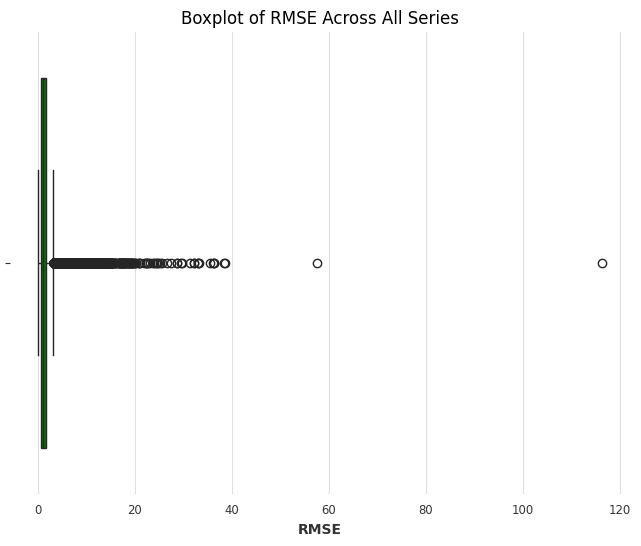

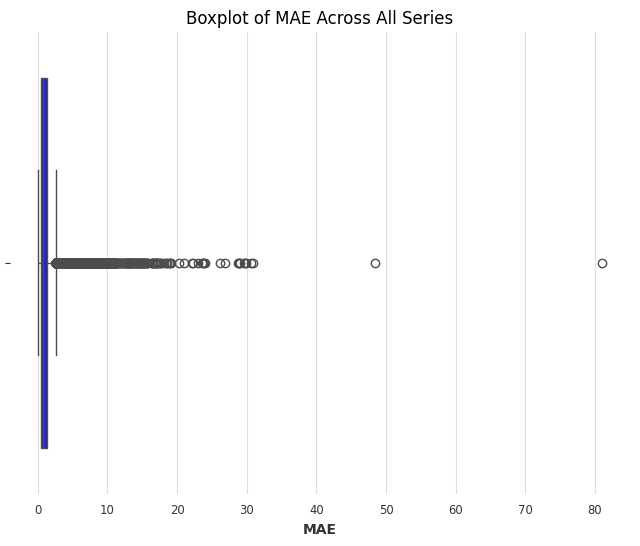

In [17]:
# Plot a boxplot of RMSE values
plt.figure(figsize=(8, 6))
sns.boxplot(x=metrics_df['RMSE'], color='green')
plt.title('Boxplot of RMSE Across All Series')
plt.xlabel('RMSE')
plt.show()

# Plot a boxplot of RMSE values
plt.figure(figsize=(8, 6))
sns.boxplot(x=metrics_df['MAE'], color='blue')
plt.title('Boxplot of MAE Across All Series')
plt.xlabel('MAE')
plt.show()


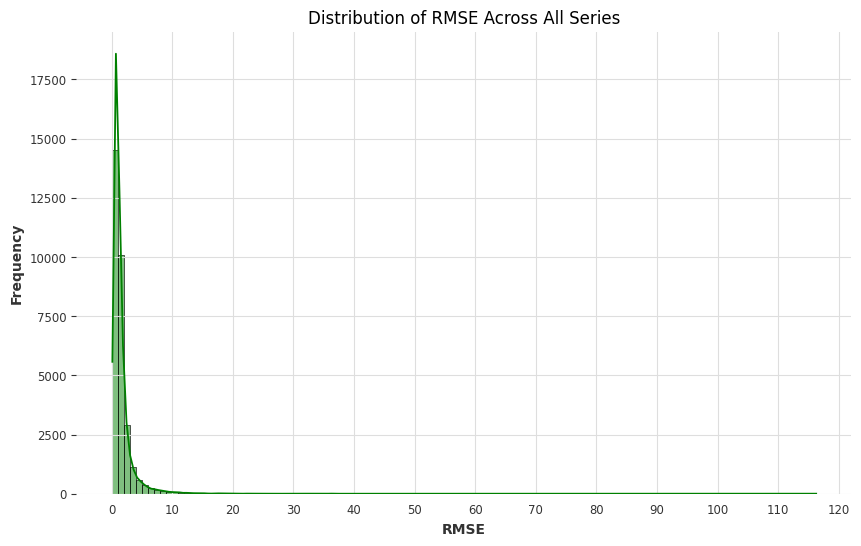

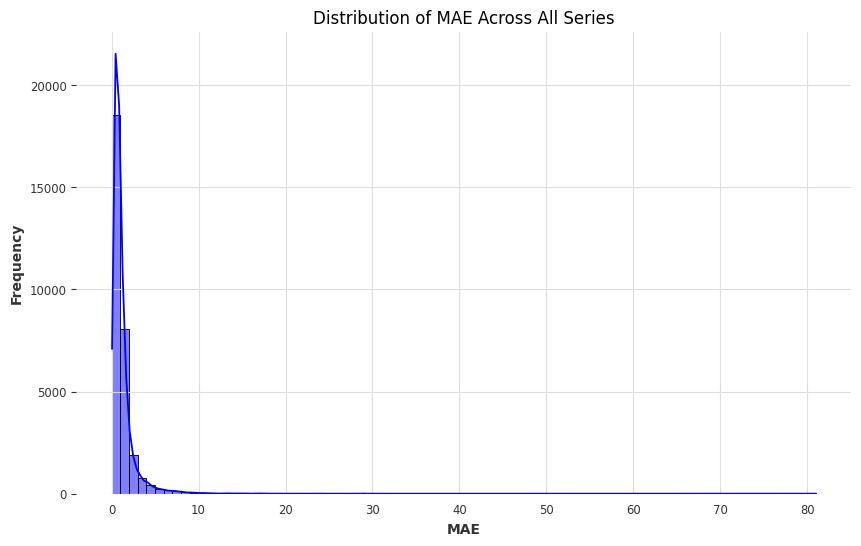

In [18]:
# Define bin width and range for x-axis ticks
bin_width = 1  # Each bar represents a width of 1
x_min = int(metrics_df['RMSE'].min())  # Round to the nearest integer
x_max = int(metrics_df['RMSE'].max())  # Round to the nearest integer
bins = np.arange(x_min, x_max + bin_width, bin_width)  # Ensure each bin is of width 1
  # Set x-axis ticks with increments of 10
x_ticks = np.arange(0, x_max + 10, 10)
# Plot a histogram of RMSE values
plt.figure(figsize=(10, 6))
sns.histplot(metrics_df['RMSE'], bins=bins, kde=True, color='green')

# Set title and labels
plt.title('Distribution of RMSE Across All Series')
plt.xlabel('RMSE')
plt.ylabel('Frequency')

# Set x-axis tick increments
plt.xticks(x_ticks)

plt.show()



# Define bin width and range for x-axis ticks
bin_width = 1  # Each bar represents a width of 1
x_min = int(metrics_df['MAE'].min())  # Round to the nearest integer
x_max = int(metrics_df['MAE'].max())  # Round to the nearest integer
bins = np.arange(x_min, x_max + bin_width, bin_width)  # Ensure each bin is of width 1
  # Set x-axis ticks with increments of 10
x_ticks = np.arange(0, x_max + 10, 10)
# Plot a histogram of RMSE values
plt.figure(figsize=(10, 6))
sns.histplot(metrics_df['MAE'], bins=bins, kde=True, color='blue')

# Set title and labels
plt.title('Distribution of MAE Across All Series')
plt.xlabel('MAE')
plt.ylabel('Frequency')

# Set x-axis tick increments
plt.xticks(x_ticks)

plt.show()

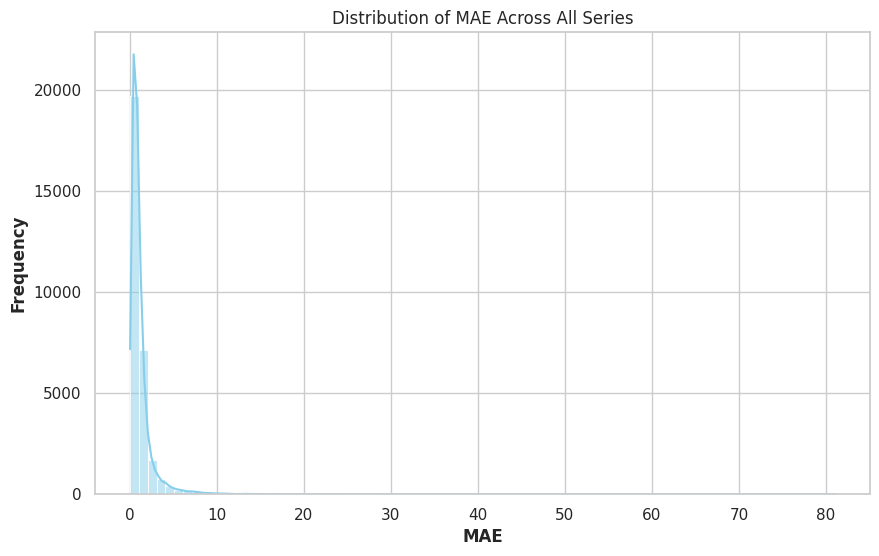

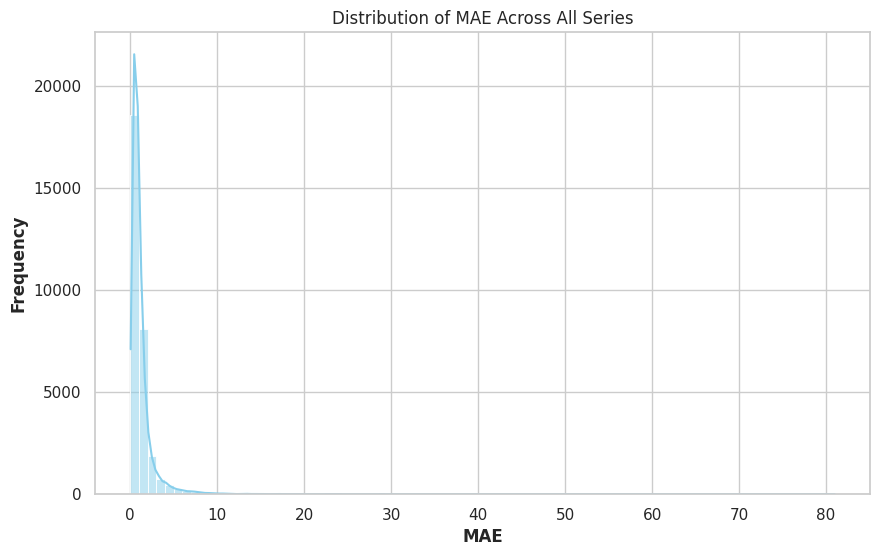

In [47]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot a histogram of RMSE values
plt.figure(figsize=(10, 6))
sns.histplot(metrics_df['MAE'], bins=80, kde=True, color='skyblue')
plt.title('Distribution of MAE Across All Series')
plt.xlabel('MAE')
plt.ylabel('Frequency')
plt.show()



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define bin width and range for x-axis ticks
bin_width = 1  # Each bar represents a width of 1
x_min = int(metrics_df['MAE'].min())  # Round to the nearest integer
x_max = int(metrics_df['MAE'].max())  # Round to the nearest integer
bins = np.arange(x_min, x_max + bin_width, bin_width)  # Ensure each bin is of width 1
x_ticks = np.arange(0, x_max + 10, 10)  # Set x-axis ticks with increments of 10

# Plot a histogram of RMSE values
plt.figure(figsize=(10, 6))
sns.histplot(metrics_df['MAE'], bins=bins, kde=True, color='skyblue')

# Set title and labels
plt.title('Distribution of MAE Across All Series')
plt.xlabel('MAE')
plt.ylabel('Frequency')

# Set x-axis tick increments
plt.xticks(x_ticks)

plt.show()
